<a href="https://colab.research.google.com/github/dl-bk/AI4_lab/blob/master/module2/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_csv(
    'https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/bike_sales.csv',
    index_col = "Unnamed: 0",
    parse_dates=['Date'])

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# Завдання 1
Виведіть середнє значення та медіану для `order_quantity`. Чи є викиди?

In [5]:
oq_mean = sales['Order_Quantity'].mean()
print(oq_mean)
oq_median = sales['Order_Quantity'].median()
print(oq_median)
#все нормально

11.901659648253654
10.0


# Завдання 2
Намалюйте гістограму та ящик з вусами для `order_quantity`

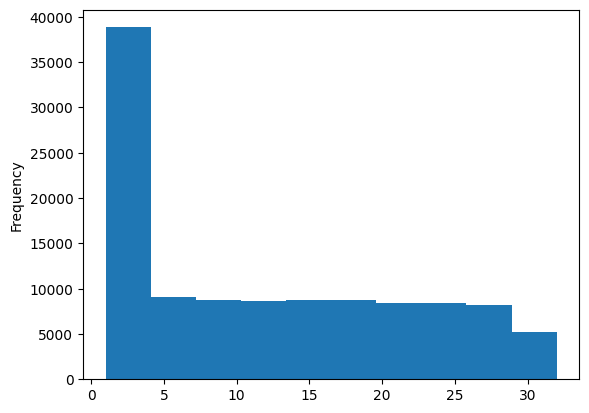

In [17]:
oq_hist = sales['Order_Quantity'].plot(kind='hist')

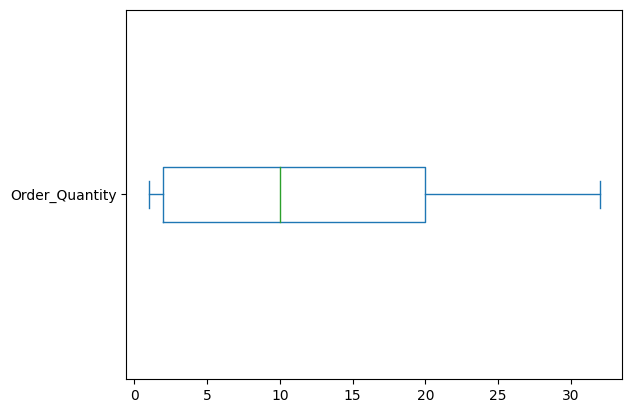

In [21]:

oq_box = sales['Order_Quantity'].plot(kind='box', vert=False)

# Завдання 3
Очистіть дані від викидів. Алгоритм:

1. Обчислюємо нижній `q1` та верхній `q3` квантилі
2. Обчислюємо медіану `median`
3. Очислюємо значення `IQR = q3 - q1`
4. Обчислюємо `lower = q1 - 1.5*IQR`
5. Обчислюємо `upper = q3 + 1.5*IQR`
6. Викидами вважаємо значення які `< lower` або `>upper`

In [22]:
def remove_outliers(df, column_name):
  column = df[column_name]
  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)
  iqr = q3 - q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  mask = (column >= lower) & (column <= upper)
  return df[mask]

In [23]:
for column_name in sales.columns:
  if sales.dtypes[column_name] in ("object", "datetime64[ns]"):
    continue
  sales = remove_outliers(sales, column_name)

# Завдання 4
Ввиведіть гістограму з кількістю чоловіків та жінок серед покупців.

<Axes: >

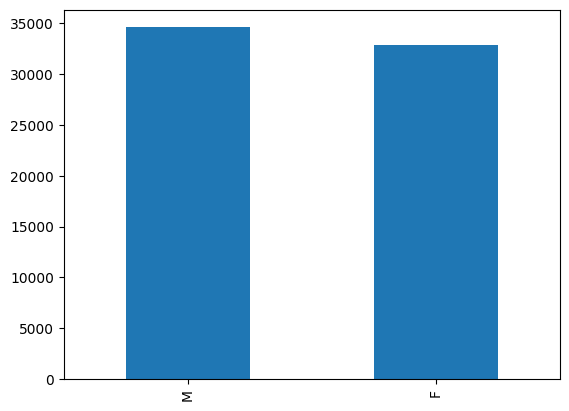

In [27]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

# Завдання 5
Виведіть точкову діаграму для ознак `order_quantity` та `revenue`

<Axes: xlabel='Order_Quantity', ylabel='Revenue'>

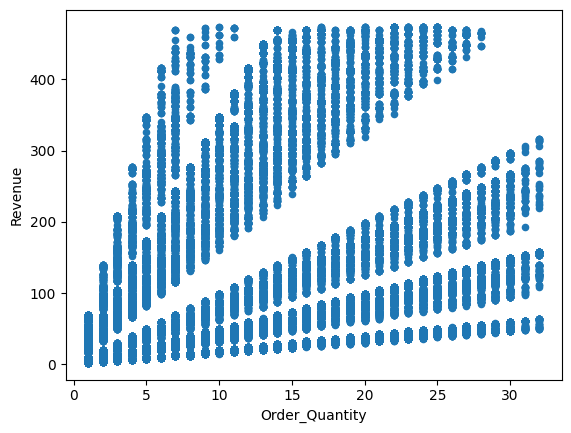

In [29]:
sales.plot(kind='scatter', x='Order_Quantity', y='Revenue')

# Завдання 6
Знайдіть категоріальну характеристику, від якої залежить ознака `profit`

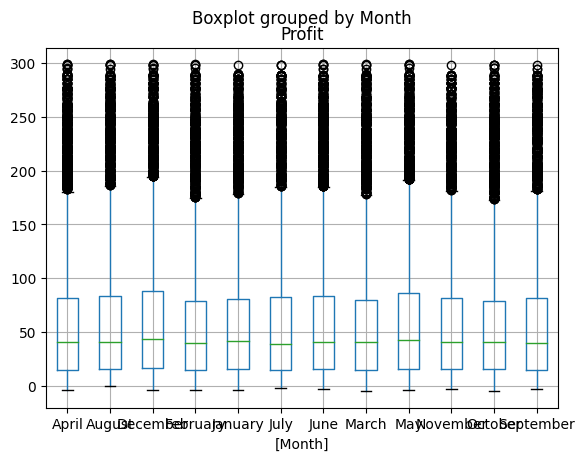

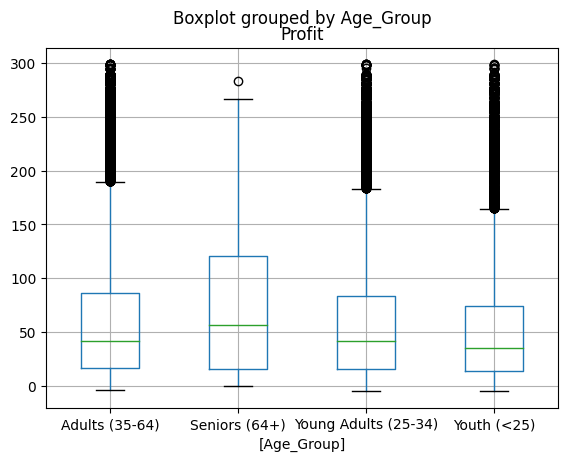

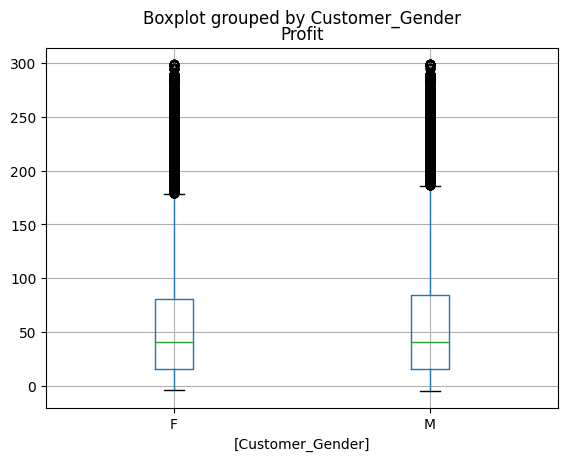

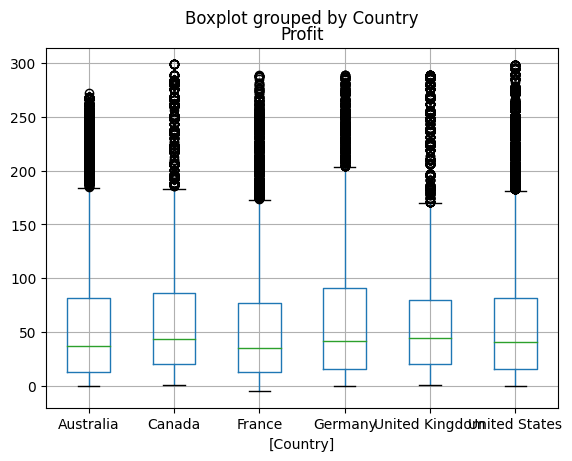

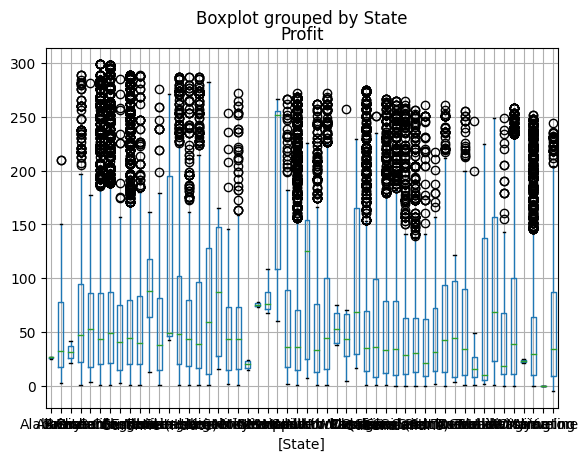

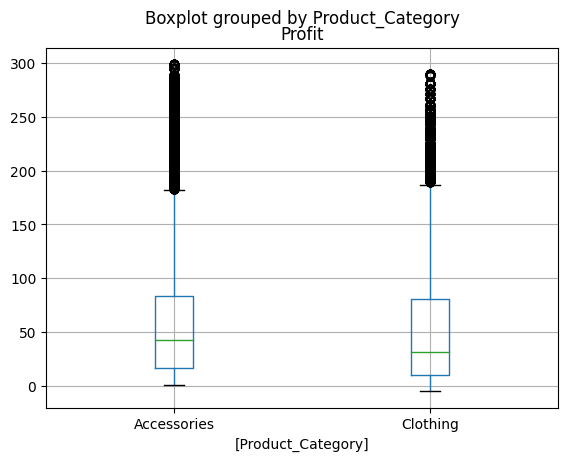

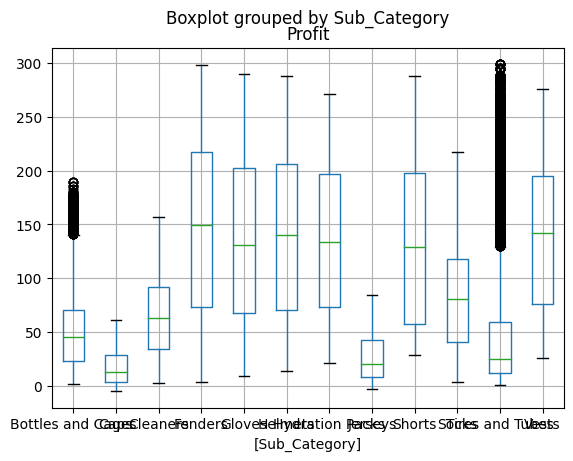

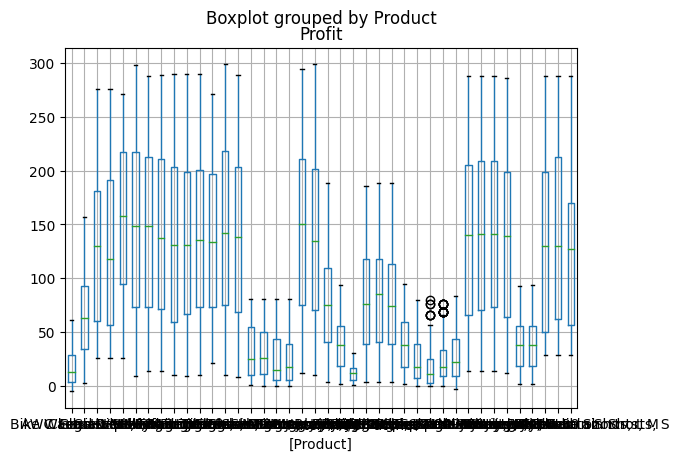

In [31]:
for column_name in sales.columns:
  if sales.dtypes[column_name] == 'object':
    col_box = sales[[column_name, 'Profit']].boxplot(by=column_name)
    plt.show()